In [49]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

In [1]:
from sklearn.model_selection import GridSearchCV
from numpy import mean
from numpy import std
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.preprocessing import MinMaxScaler
df=pd.read_csv("E:/4.dataset_150.csv")
X=df.iloc[:,:18]
y=df['output_grade']
y=y.values.ravel()
scaler = MinMaxScaler(feature_range=(0, 1))
x= scaler.fit_transform(X)
# prepare the cross-validation procedure

#cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=41)
lda = LDA(n_components=1)
x = lda.fit_transform(x, y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
model = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=model, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(x_train, y_train)

gs_NB.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 0.04328761281083057}

In [ ]:
#{'var_smoothing': 0.04328761281083057}

In [12]:
gnb = GaussianNB(var_smoothing= 0.04328761281083057)
print(gnb.fit(x,y))

GaussianNB(var_smoothing=0.04328761281083057)


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [14]:
y_pred=gnb.predict(x_test)
y_pred

array([3, 1, 2, 2, 1, 3, 1, 3, 2, 1, 1, 2, 3, 2, 2, 1, 4, 1, 3, 2, 3, 2,
       4, 4, 1, 4, 1, 4, 2, 2, 3, 2, 3, 1, 3, 3, 1, 4, 3, 2, 3, 1, 4, 4,
       3], dtype=int64)

In [15]:

accuracy_score(y_pred,y_test) #accuracy

0.9111111111111111

In [16]:
from sklearn.metrics import accuracy_score
print("accuracy is:{0:.2f}%".format(accuracy_score(y_test,y_pred)*100))


accuracy is:91.11%


In [22]:
#gnb.predict_proba(x_test)

In [18]:
y_pred

array([3, 1, 2, 2, 1, 3, 1, 3, 2, 1, 1, 2, 3, 2, 2, 1, 4, 1, 3, 2, 3, 2,
       4, 4, 1, 4, 1, 4, 2, 2, 3, 2, 3, 1, 3, 3, 1, 4, 3, 2, 3, 1, 4, 4,
       3], dtype=int64)

In [19]:
y_test

array([3, 1, 2, 2, 1, 3, 1, 4, 2, 1, 1, 3, 3, 2, 2, 1, 4, 1, 3, 2, 3, 2,
       4, 4, 1, 4, 1, 4, 3, 2, 3, 2, 3, 1, 3, 3, 1, 4, 3, 2, 3, 1, 4, 4,
       2], dtype=int64)

<AxesSubplot:>

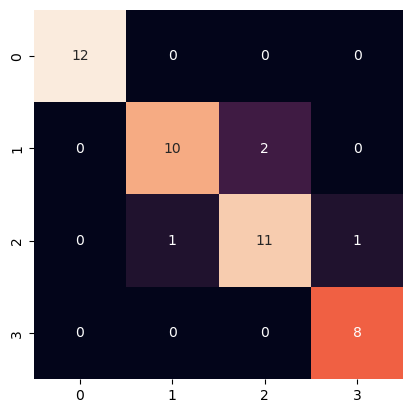

In [20]:
#cm=confusion_matrix(y_test,y_pred)
#cm
from sklearn.metrics import confusion_matrix
import seaborn as sns
#plt.figure(figsize=(10,7))
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)


In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.83      0.91      0.87        11
           3       0.85      0.85      0.85        13
           4       1.00      0.89      0.94         9

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



In [ ]:
#training and validation accuracy

In [23]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
# evaluate model
scores = cross_val_score(gnb, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (100*mean(scores), 100*std(scores)))

Accuracy: 88.000 (4.000)


In [25]:
#Testing Accuracy
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.83      0.91      0.87        11
           3       0.85      0.85      0.85        13
           4       1.00      0.89      0.94         9

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



In [29]:
from numpy import mean
from numpy import std
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB


def cross_validation(model,x,y, cv=5):     
    scoring={'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'micro'),
           'recall': make_scorer(recall_score, average = 'micro'),
           'f1_macro': make_scorer(f1_score, average = 'micro'),
           #'f1_weighted': make_scorer(f1_score, average = 'weighted')
        }    
    results = cross_validate(model, x, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=True)

    return {"Training Accuracy scores": results['train_accuracy'],
             "Validation Accuracy scores": results['test_accuracy'], 
            
              "Training Precision scores": results['train_precision'],
              "Validation Precision scores": results['test_precision'],
          
              "Training Recall scores": results['train_recall'],
             "Validation Recall scores": results['test_recall'],
            
              "Training F1 scores": results['train_f1_macro'],
             "Validation F1 scores": results['test_f1_macro'],
            
             "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Mean Training Precision": results['train_precision'].mean(),
              "Mean Validation Precision": results['test_precision'].mean(),
              "Mean Training Recall": results['train_recall'].mean(),
              "Mean Validation Recall": results['test_recall'].mean(),
              "Mean Training F1 Score": results['train_f1_macro'].mean(),
              "Mean Validation F1 Score": results['test_f1_macro'].mean()
                      }



result = cross_validation(model, x_train,y_train, 5)
print(result)

{'Training Accuracy scores': array([0.89285714, 0.89285714, 0.9047619 , 0.89285714, 0.89285714]), 'Validation Accuracy scores': array([0.9047619 , 0.85714286, 0.9047619 , 0.9047619 , 0.80952381]), 'Training Precision scores': array([0.89285714, 0.89285714, 0.9047619 , 0.89285714, 0.89285714]), 'Validation Precision scores': array([0.9047619 , 0.85714286, 0.9047619 , 0.9047619 , 0.80952381]), 'Training Recall scores': array([0.89285714, 0.89285714, 0.9047619 , 0.89285714, 0.89285714]), 'Validation Recall scores': array([0.9047619 , 0.85714286, 0.9047619 , 0.9047619 , 0.80952381]), 'Training F1 scores': array([0.89285714, 0.89285714, 0.9047619 , 0.89285714, 0.89285714]), 'Validation F1 scores': array([0.9047619 , 0.85714286, 0.9047619 , 0.9047619 , 0.80952381]), 'Mean Training Accuracy': 89.52380952380953, 'Mean Validation Accuracy': 87.6190476190476, 'Mean Training Precision': 0.8952380952380953, 'Mean Validation Precision': 0.8761904761904761, 'Mean Training Recall': 0.8952380952380953

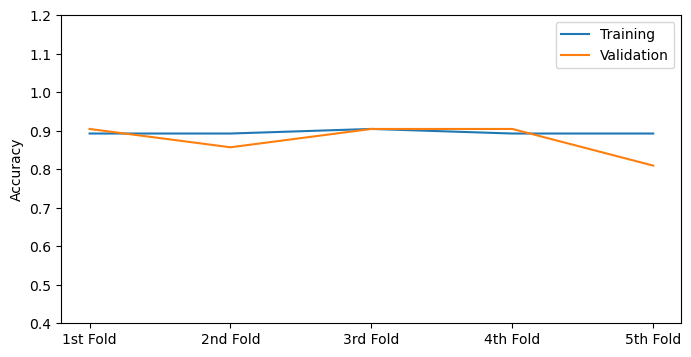

In [30]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold","6th Fold","7th Fold"]
X_axis = np.arange(len(labels))
plt.xticks(X_axis, labels)  
# Function to plot  
plt.ylim(0.40000, 1.2)
plt.plot(result["Training Accuracy scores"])
plt.plot(result["Validation Accuracy scores"])
plt.ylabel("Accuracy")  
# Function add a legend  
plt.legend(["Training", "Validation"], loc ="upper right")
  
# function to show the plot
plt.show()

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished


{'var_smoothing': 0.01873817422860384}

In [3]:
#y_pred=gs_NB.predict(x_test)
#print(classification_report(y_test,y_pred))

In [9]:

import numpy as np
def plot_result(x_label, y_label, plot_title, train_data, val_data):
               
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.2, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.2, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

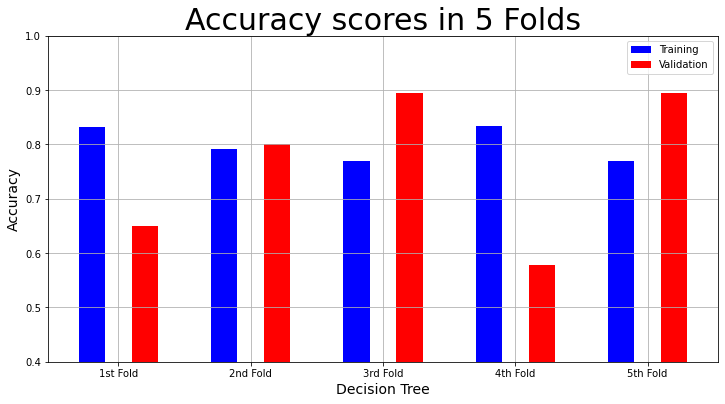

In [10]:
# Plot Accuracy Result
from matplotlib import pyplot as plt
%matplotlib inline
model_name = "Naive Bayes"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            result["Training Accuracy scores"],
            result["Validation Accuracy scores"])